# Этапы работы над проектом:
    1. Изучение значений датафрейма в целом
    2. Исправления столбцов(удаление лишнего)
    3. Изучение значений каждого столбца и удаление выбросов
    4. Замена NaN и пустых значений на None
    5. Анализ корреляций

## Этап 1. Изучение значений датафрейма в целом

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

In [2]:
pd.set_option('display.max_rows', 50) # показывать больше 50 строк
pd.set_option('display.max_columns', 50) # показывать больше 50 колонок

In [3]:
studmath = pd.read_csv('stud_math.xls')

In [107]:
studmath.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

In [ ]:
Количественные признаки: 3(age), 7(Medu), 8 (Fedu), 13 (traveltime), 14(studytime), 
    15(failures), 24 (famrel), 25(freetime), 26(goout), 27 (health) 28(absences), 29 (score)

In [156]:
studmath.tail(45)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,NaN,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN
351,MS,M,17,U,GT3,T,3.0,3.0,health,other,course,mother,2.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,5.0,4.0,3.0,2.0,65.0
352,MS,M,18,U,LE3,T,1.0,3.0,at_home,services,course,mother,1.0,1.0,1.0,no,no,no,no,yes,no,yes,yes,4.0,3.0,3.0,3.0,NaN,40.0
353,MS,M,19,R,GT3,T,1.0,1.0,other,other,home,other,3.0,1.0,1.0,no,yes,no,no,yes,yes,yes,no,4.0,4.0,4.0,5.0,4.0,40.0
354,MS,M,17,NaN,GT3,T,4.0,3.0,services,other,home,mother,2.0,2.0,0.0,no,yes,yes,yes,no,yes,yes,yes,4.0,5.0,5.0,2.0,4.0,55.0
355,MS,F,18,U,GT3,T,3.0,3.0,services,services,course,father,1.0,2.0,0.0,no,yes,no,no,yes,yes,no,yes,NaN,3.0,4.0,5.0,0.0,45.0
356,MS,F,17,R,GT3,T,4.0,4.0,teacher,services,other,father,2.0,2.0,0.0,no,yes,NaN,yes,yes,yes,yes,no,4.0,3.0,3.0,5.0,4.0,65.0
357,MS,F,17,U,LE3,NaN,3.0,2.0,services,other,reputation,mother,2.0,2.0,0.0,no,no,no,no,yes,yes,no,yes,1.0,2.0,3.0,5.0,2.0,55.0
358,MS,M,18,U,LE3,T,1.0,1.0,other,services,home,father,2.0,1.0,0.0,no,no,no,no,no,yes,yes,yes,3.0,3.0,2.0,3.0,4.0,50.0
359,MS,F,18,NaN,LE3,T,1.0,1.0,at_home,services,course,father,2.0,3.0,0.0,no,no,no,no,NaN,yes,yes,no,5.0,3.0,2.0,4.0,0.0,80.0


In [108]:
studmath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

## 2. Исправления столбцов(удаление лишнего)

In [ ]:
studmath.['studytime, granular']

In [4]:
# ниже удление лишнего столбца
studmath = studmath.drop(['studytime, granular'], axis=1)

In [5]:
studmath.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

## 3. Изучение значений каждого столбца и удаление выбросов

На данном этапе определим выбросы и NaN значения.
Названия номер и пояснения к каждому столбцу даны в комментариях над кодом

In [109]:
#1 school — аббревиатура школы, в которой учится ученик
studmath.school.unique()

array(['GP', 'MS'], dtype=object)

In [110]:
studmath.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [55]:
# 2 sex — пол ученика ('F' - женский, 'M' - мужской)
studmath.sex.unique()

array(['F', 'M'], dtype=object)

In [56]:
studmath.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

In [76]:
#3 age — возраст ученика (от 15 до 22)
sorted(studmath.age.unique()) #   выбросов нет

[15, 16, 17, 18, 19, 20, 21, 22]

In [49]:
studmath.age.value_counts()

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

In [32]:
# 4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
studmath.address.unique()

array(['U', None, 'R'], dtype=object)

In [202]:
studmath[studmath.address=='nan']

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


In [204]:
pd.isnull(studmath.address).sum()

15

In [43]:
studmath.address.value_counts()

U    295
R     83
Name: address, dtype: int64

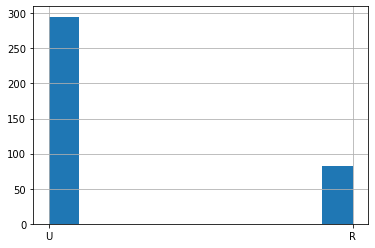

In [111]:
studmath.address.hist()

In [19]:
# 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
studmath.famsize.unique()

array([nan, 'GT3', 'LE3'], dtype=object)

In [59]:
studmath.famsize.value_counts()

GT3    261
LE3    107
Name: famsize, dtype: int64

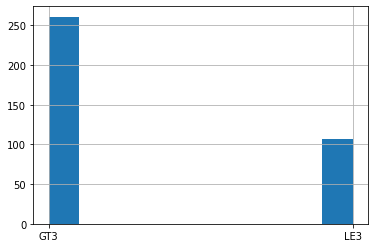

In [60]:
studmath.famsize.hist()

In [62]:
# 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
studmath.Pstatus.unique()

array(['A', nan, 'T'], dtype=object)

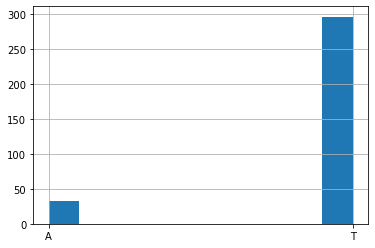

In [76]:
studmath.Pstatus.hist()

In [72]:
'''7 Medu — образование матери 
    (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)''' 
sorted(studmath.Medu.unique()) # выбросов нет

[0.0, 1.0, 2.0, 3.0, 4.0, nan]

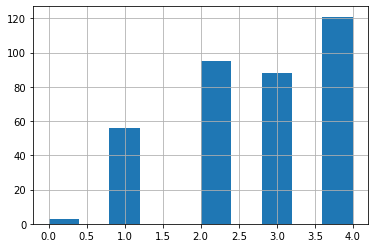

In [77]:
studmath.Medu.hist()

In [112]:
'''8 Fedu — образование отца 
    (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)'''
sorted(studmath.Fedu.unique()) # выброс 40

[0.0, 1.0, 2.0, 3.0, 4.0, 40.0, nan]

In [113]:
studmath.Fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [ ]:
studmath = studmath[(studmath.Fedu>=1)&(studmath.Fedu<=4)]

In [173]:
studmath.loc[11, 'Fedu']

40.0

In [42]:
#Скорее всего имелось ввиду значение 4
studmath.loc[studmath.Fedu==40]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


In [41]:
#заменим 40 на 4
studmath.loc[11, 'Fedu'] = 4

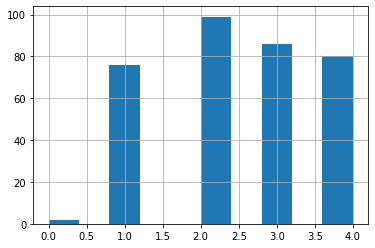

In [78]:
studmath.Fedu.hist()

In [84]:
''' 9 Mjob — работа матери 
    ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)'''
studmath.Mjob.unique()

array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

In [82]:
studmath.Mjob.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

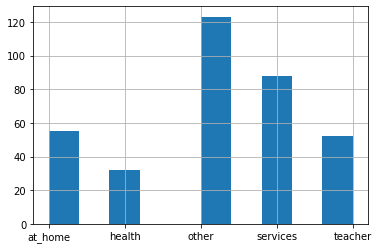

In [79]:
studmath.Mjob.hist()

In [ ]:
''' 10 Fjob — работа отца 
    ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)'''

In [85]:
studmath.Fjob.unique()

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

In [86]:
studmath.Fjob.value_counts()

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

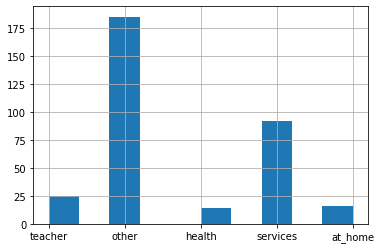

In [80]:
studmath.Fjob.hist()

In [87]:
#11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
studmath.reason.unique()

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

In [88]:
studmath.reason.value_counts()

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

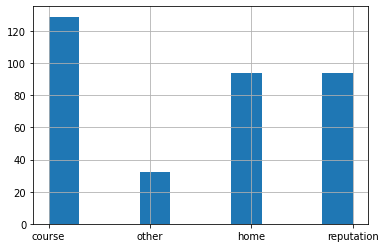

In [90]:
studmath.reason.hist()

In [ ]:
#12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
studmath.guardian.unique()

In [89]:
studmath.guardian.value_counts()

mother    250
father     86
other      28
Name: guardian, dtype: int64

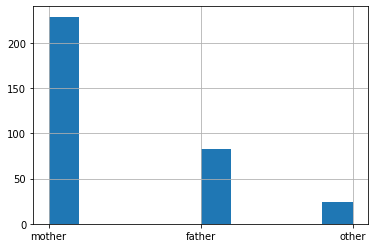

In [89]:
studmath.guardian.hist()

In [91]:
#13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
sorted(studmath.traveltime.unique())

[1.0, 2.0, 3.0, nan, 4.0]

In [92]:
studmath.traveltime.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

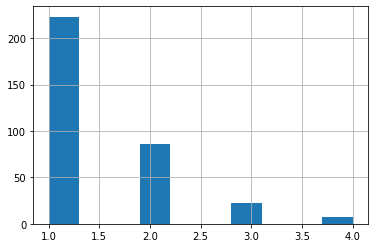

In [88]:
studmath.traveltime.hist()

In [118]:
#14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
sorted(studmath.studytime.unique())

[1.0, 2.0, 3.0, nan, 4.0]

In [117]:
studmath.studytime.value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

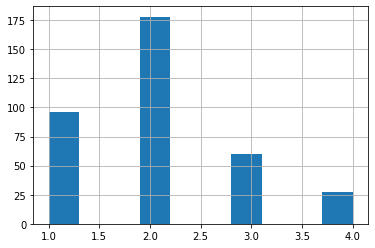

In [87]:
studmath.studytime.hist()

In [120]:
#15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
sorted(studmath.failures.unique())

[0.0, 3.0, nan, 1.0, 2.0]

In [121]:
studmath.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

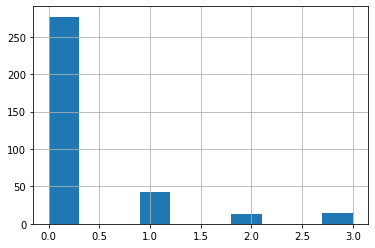

In [86]:
studmath.failures.hist()

In [123]:
#16 schoolsup — дополнительная образовательная поддержка (yes или no)
studmath.schoolsup.unique()

array(['yes', 'no', nan], dtype=object)

In [124]:
studmath.schoolsup.value_counts()

no     335
yes     51
Name: schoolsup, dtype: int64

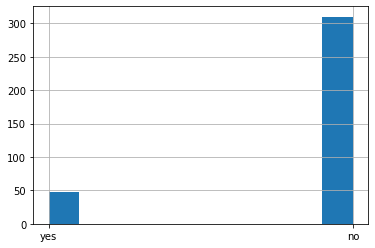

In [85]:
studmath.schoolsup.hist()

In [125]:
#17 famsup — семейная образовательная поддержка (yes или no)
studmath.famsup.unique()

array(['no', 'yes', nan], dtype=object)

In [126]:
studmath.famsup.value_counts()

yes    219
no     137
Name: famsup, dtype: int64

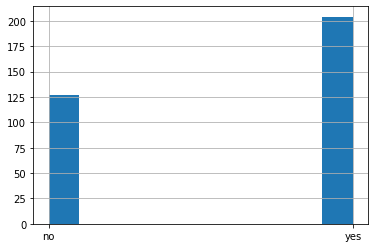

In [84]:
studmath.famsup.hist()

In [127]:
#18 paid — дополнительные платные занятия по математике (yes или no)
studmath.paid.unique()

array(['no', nan, 'yes'], dtype=object)

In [128]:
studmath.paid.value_counts()

no     200
yes    155
Name: paid, dtype: int64

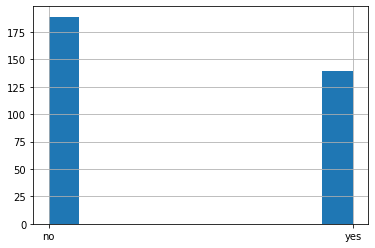

In [83]:
studmath.paid.hist()

In [129]:
#19 activities — дополнительные внеучебные занятия (yes или no)
studmath.activities.unique()

array(['no', 'yes', nan], dtype=object)

In [130]:
studmath.activities.value_counts()

yes    195
no     186
Name: activities, dtype: int64

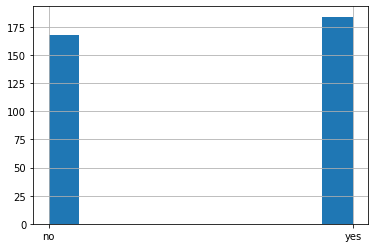

In [91]:
studmath.activities.hist()

In [ ]:
#20 nursery — посещал детский сад (yes или no)

In [28]:
studmath.nursery.unique()

array(['yes', 'no', None], dtype=object)

In [29]:
studmath.nursery.value_counts()

yes    300
no      79
Name: nursery, dtype: int64

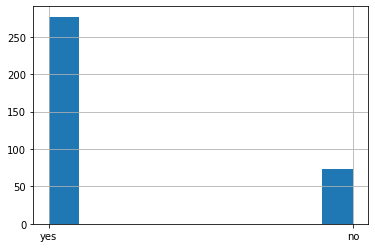

In [81]:
studmath.nursery.hist()

In [133]:
# 21 higher — хочет получить высшее образование (yes или no)
studmath.higher.unique()

array(['yes', nan, 'no'], dtype=object)

In [134]:
studmath.higher.value_counts()

yes    356
no      19
Name: higher, dtype: int64

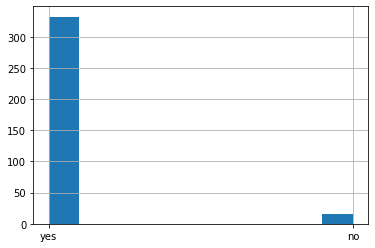

In [92]:
studmath.higher.hist()

In [135]:
# 22 internet — наличие интернета дома (yes или no)
studmath.internet.unique()

array([nan, 'yes', 'no'], dtype=object)

In [136]:
studmath.internet.value_counts()

yes    305
no      56
Name: internet, dtype: int64

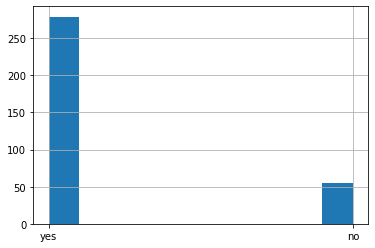

In [94]:
studmath.internet.hist()

In [137]:
# 23 romantic — в романтических отношениях (yes или no)
studmath.romantic.unique()

array(['no', nan, 'yes'], dtype=object)

In [138]:
studmath.romantic.value_counts()

no     240
yes    124
Name: romantic, dtype: int64

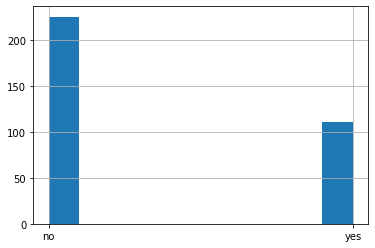

In [95]:
studmath.romantic.hist()

In [184]:
# 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
sorted(studmath.famrel.unique()) # 2-й выброс

[1.0, 2.0, 3.0, 4.0, 5.0, nan]

In [185]:
studmath.famrel.value_counts()

4.0    182
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

In [45]:
# скорее всего знак - в -1 введён по оишбке: 
studmath.famrel[studmath.famrel==-1]

Series([], Name: famrel, dtype: float64)

In [44]:
# заменим на 1
studmath.famrel[studmath.famrel==-1]=1

<ipython-input-44-a7355df5ad8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studmath.famrel[studmath.famrel==-1]=1


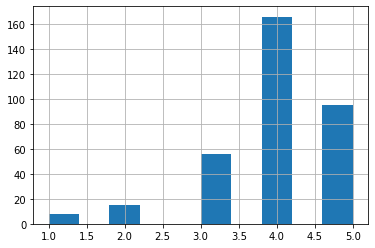

In [96]:
studmath.famrel.hist()

In [182]:
# 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
sorted(studmath.freetime.unique())

[1.0, 2.0, 3.0, 4.0, 5.0, nan]

In [143]:
studmath.freetime.value_counts()

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

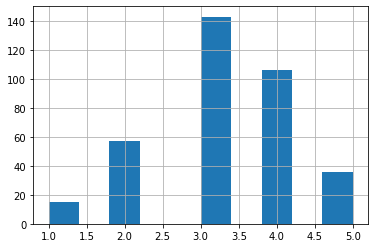

In [97]:
studmath.freetime.hist()

In [144]:
# 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
sorted(studmath.goout.unique())

[1.0, 2.0, 3.0, 4.0, 5.0, nan]

In [145]:
studmath.goout.value_counts()

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

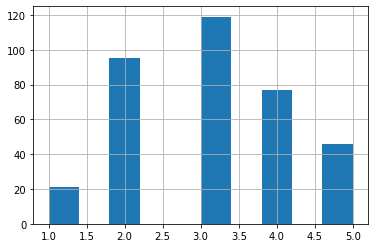

In [98]:
studmath.goout.hist()

In [146]:
# 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
sorted(studmath.health.unique())

[1.0, 2.0, 3.0, 4.0, 5.0, nan]

In [147]:
studmath.health.value_counts()

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

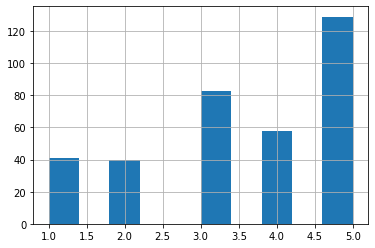

In [99]:
studmath.health.hist()

In [148]:
# 28 absences — количество пропущенных занятий
sorted(studmath.absences.unique())

[0.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 12.0,
 13.0,
 14.0,
 16.0,
 nan,
 1.0,
 11.0,
 15.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 28.0,
 30.0,
 38.0,
 40.0,
 54.0,
 56.0,
 75.0,
 212.0,
 385.0]

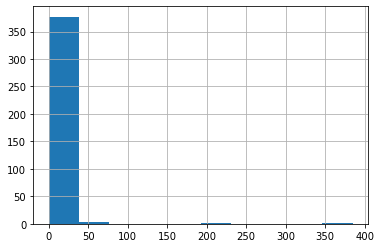

In [46]:
studmath.absences.hist()

In [48]:
# Определяем выбросы
IQR = studmath.absences.quantile(0.75) - studmath.absences.quantile(0.25)
perc25 = studmath.absences.quantile(0.25)
perc75 = studmath.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


Вывод: выбросы есть, надо их удалить

In [49]:
studmath = studmath.loc[studmath.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

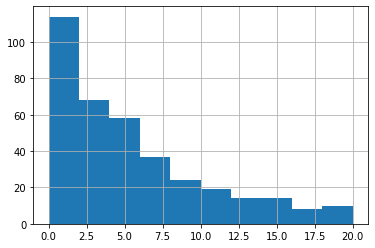

In [50]:
studmath.absences.hist()

In [196]:
# 29 score — баллы по госэкзамену по математике
sorted(studmath.score.unique())

[0.0,
 25.0,
 30.0,
 35.0,
 40.0,
 45.0,
 50.0,
 55.0,
 60.0,
 65.0,
 70.0,
 75.0,
 80.0,
 85.0,
 90.0,
 95.0,
 100.0,
 nan]

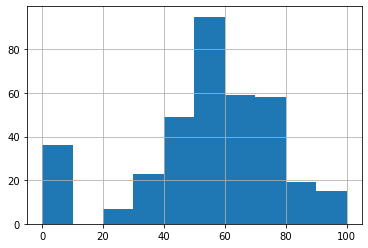

In [197]:
studmath.score.hist()

In [198]:
IQR = studmath.score.quantile(0.75) - studmath.score.quantile(0.25)
perc25 = studmath.score.quantile(0.25)
perc75 = studmath.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


In [ ]:
Вывод: выбросов нет

In [199]:
studmath.score.value_counts()

50.0     53
55.0     42
0.0      36
75.0     31
65.0     30
60.0     29
70.0     27
40.0     26
45.0     23
80.0     16
30.0     14
35.0      9
90.0      9
25.0      7
95.0      5
85.0      3
100.0     1
Name: score, dtype: int64

## Этап 4. Замена NaN и пустых значений на None

In [31]:
# подсчёт пустых значений
pd.isnull(studmath).sum()

school         0
sex            0
age            0
address       17
famsize       27
Pstatus       45
Medu           3
Fedu          24
Mjob          19
Fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
higher        20
internet      34
romantic      31
famrel        27
freetime      11
goout          8
health        15
absences      12
score          6
dtype: int64

In [219]:
type(studmath.loc[0][4])

float

In [24]:
# функция change_none для изменения всех пустых и nan значений на None
func = lambda x: None if pd.isnull(x) else None if x == 'NaN' else x
def change_none(column):
    studmath[column] = studmath[column].apply(func)

In [25]:
# столбцы 
columns = studmath.columns
columns

# применение функции change_none:
for c in columns:
    change_none(c)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

In [30]:
studmath.tail(45)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
350,MS,M,19,None,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,None,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN
351,MS,M,17,U,GT3,T,3.0,3.0,health,other,course,mother,2.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,5.0,4.0,3.0,2.0,65.0
352,MS,M,18,U,LE3,T,1.0,3.0,at_home,services,course,mother,1.0,1.0,1.0,no,no,no,no,yes,no,yes,yes,4.0,3.0,3.0,3.0,NaN,40.0
353,MS,M,19,R,GT3,T,1.0,1.0,other,other,home,other,3.0,1.0,1.0,no,yes,no,no,yes,yes,yes,no,4.0,4.0,4.0,5.0,4.0,40.0
354,MS,M,17,None,GT3,T,4.0,3.0,services,other,home,mother,2.0,2.0,0.0,no,yes,yes,yes,no,yes,yes,yes,4.0,5.0,5.0,2.0,4.0,55.0
355,MS,F,18,U,GT3,T,3.0,3.0,services,services,course,father,1.0,2.0,0.0,no,yes,no,no,yes,yes,no,yes,NaN,3.0,4.0,5.0,0.0,45.0
356,MS,F,17,R,GT3,T,4.0,4.0,teacher,services,other,father,2.0,2.0,0.0,no,yes,None,yes,yes,yes,yes,no,4.0,3.0,3.0,5.0,4.0,65.0
357,MS,F,17,U,LE3,None,3.0,2.0,services,other,reputation,mother,2.0,2.0,0.0,no,no,no,no,yes,yes,no,yes,1.0,2.0,3.0,5.0,2.0,55.0
358,MS,M,18,U,LE3,T,1.0,1.0,other,services,home,father,2.0,1.0,0.0,no,no,no,no,no,yes,yes,yes,3.0,3.0,2.0,3.0,4.0,50.0
359,MS,F,18,None,LE3,T,1.0,1.0,at_home,services,course,father,2.0,3.0,0.0,no,no,no,no,None,yes,yes,no,5.0,3.0,2.0,4.0,0.0,80.0


In [51]:
#промежуточный, чтобы не терять достижений (после удаления выбросов и замены значений на None)
studmath_reserve=studmath

## Этап 5. Анализ корреляций

In [ ]:
Количественные признаки: 3(age), 7(Medu), 8 (Fedu), 13 (traveltime), 14(studytime), 
    15(failures), 24 (famrel), 25(freetime), 26(goout), 27 (health) 28(absences), 29 (score)

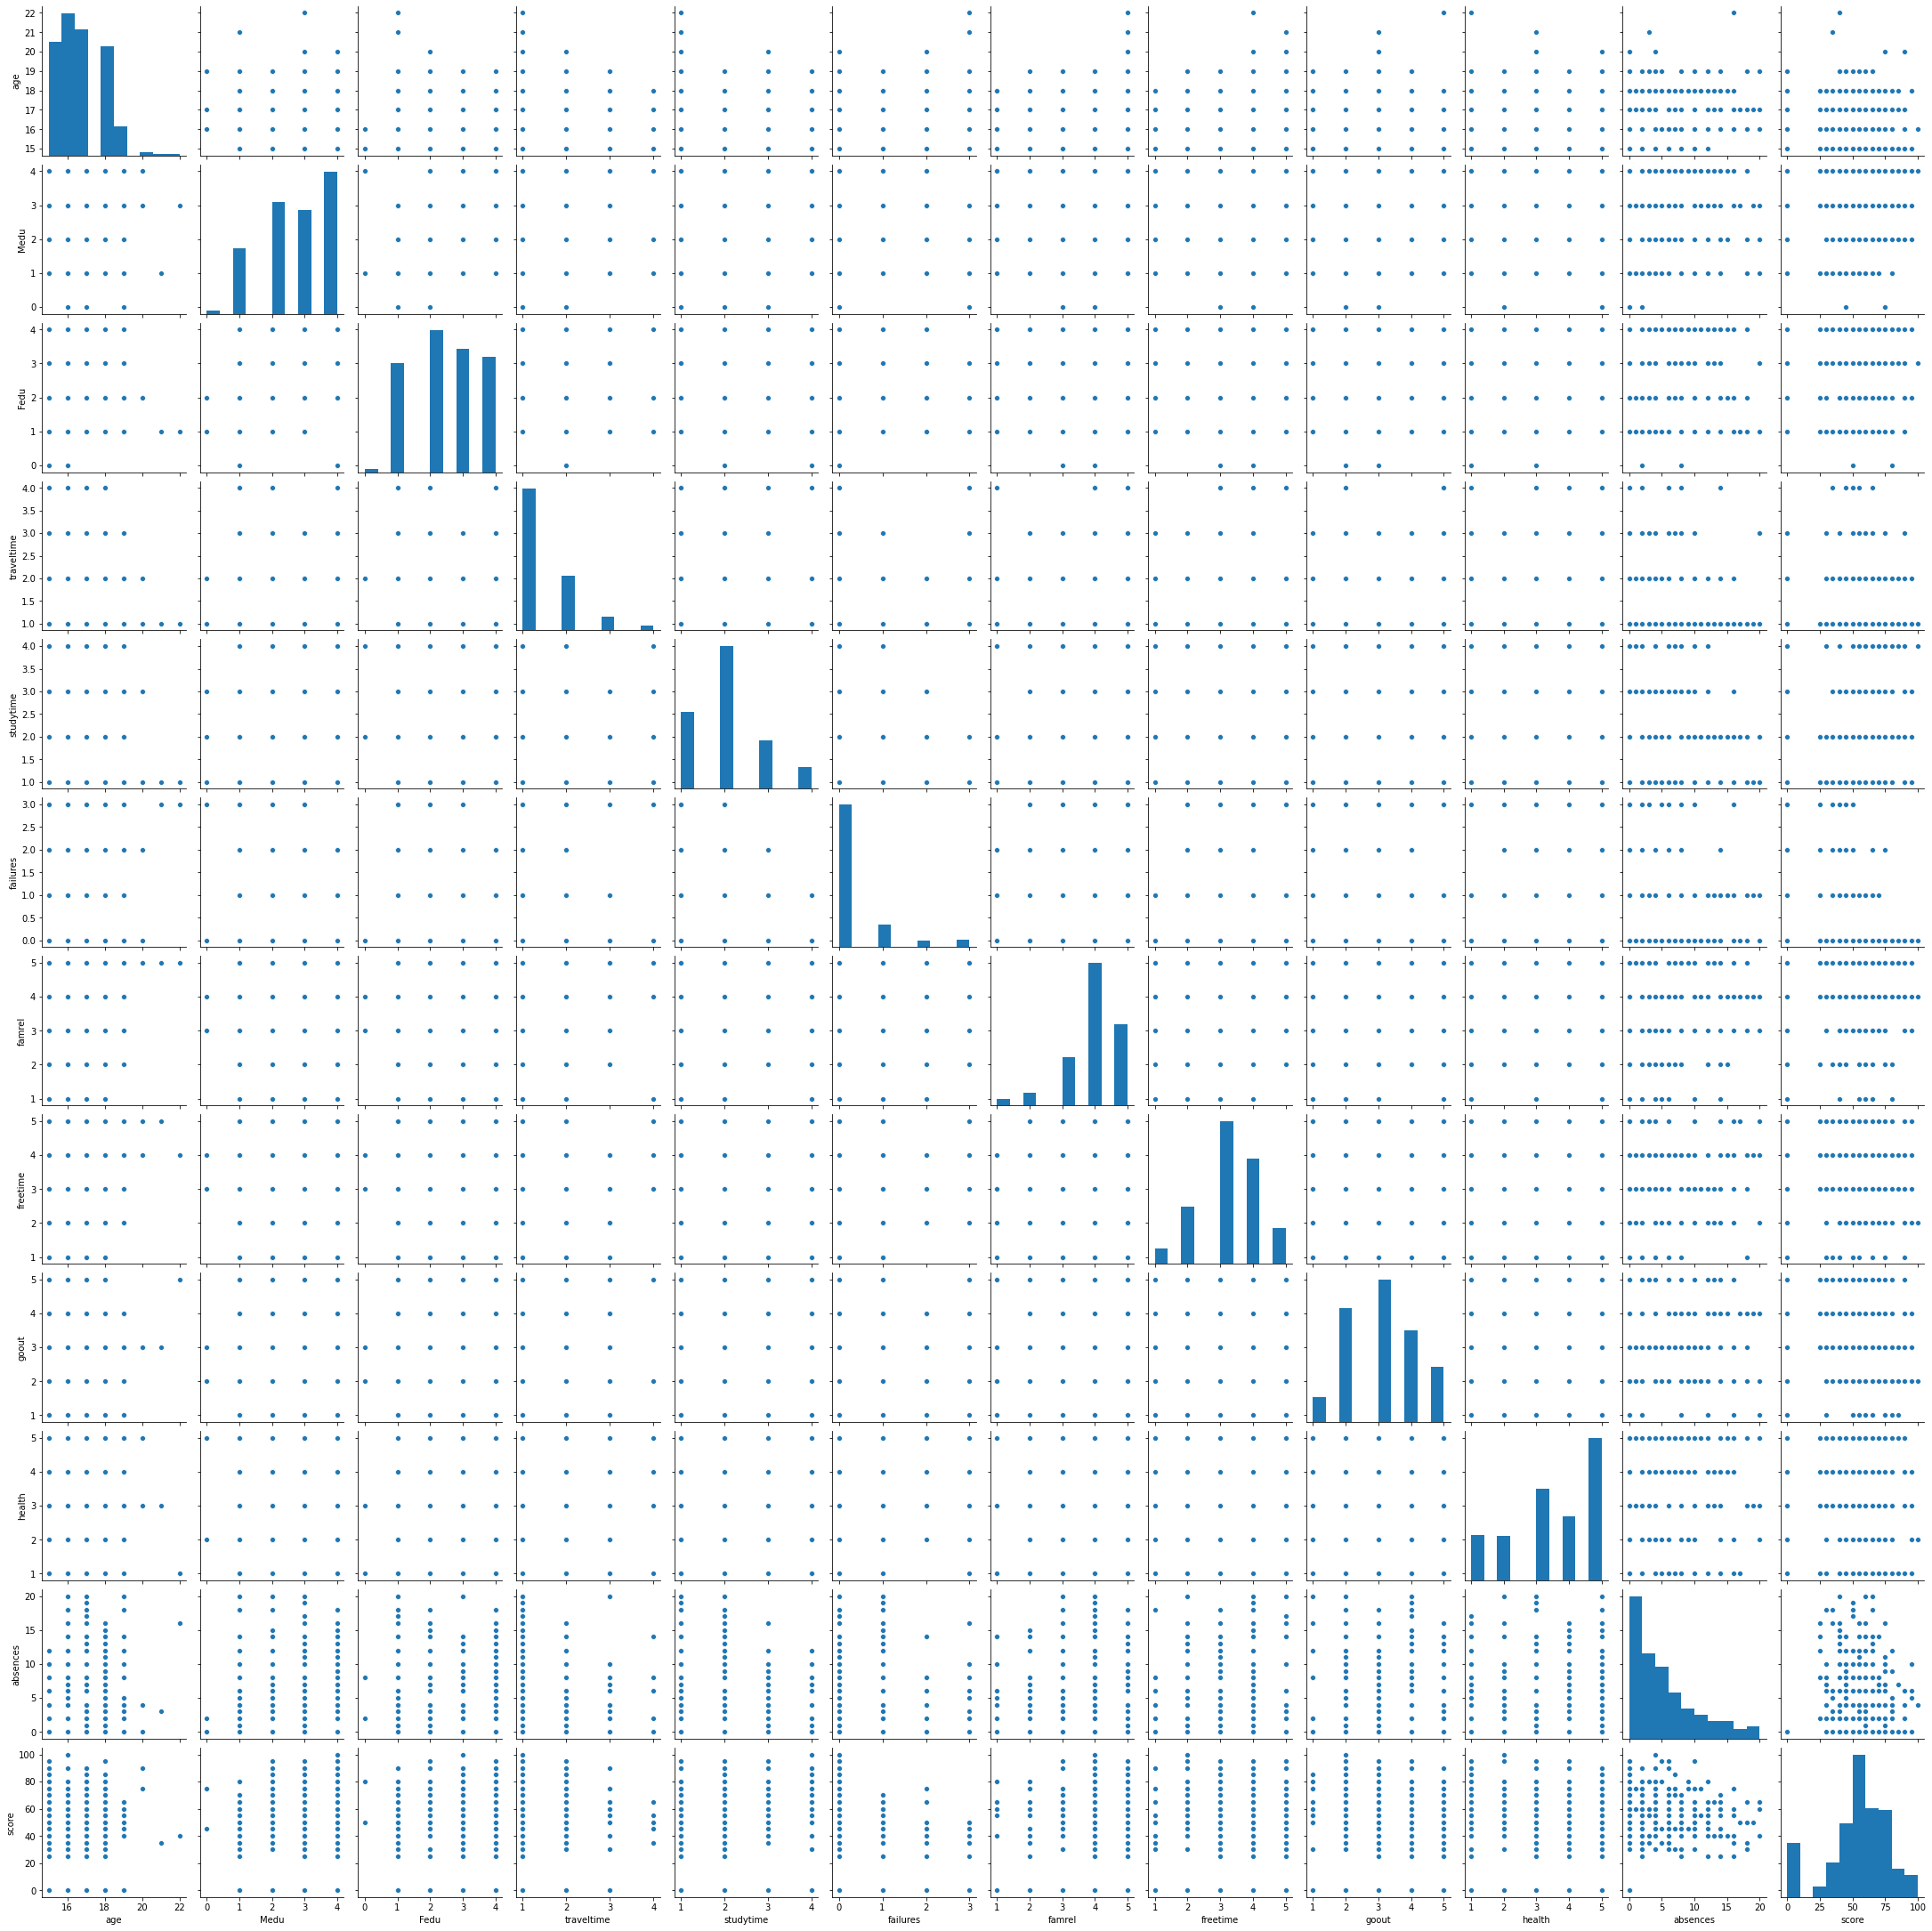

In [64]:
# Отображение корреляций всех переменных:
sns.pairplot(studmath, kind='reg')

In [67]:
#Выявим существующие корреляции 
studmath.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.182463,-0.185368,0.085659,0.003035,0.195400,0.063204,0.058193,0.135466,-0.067958,0.151493,-0.159306
Medu,-0.182463,1.000000,0.629212,-0.197009,0.085532,-0.249754,-0.023323,0.027861,0.049094,-0.052316,0.065712,0.210257
Fedu,-0.185368,0.629212,1.000000,-0.145846,0.005116,-0.289421,-0.029874,-0.021205,0.029427,0.023932,-0.021811,0.113379
traveltime,0.085659,-0.197009,-0.145846,1.000000,-0.093825,0.085026,-0.025343,-0.008602,0.031481,-0.006809,-0.047995,-0.074045
studytime,0.003035,0.085532,0.005116,-0.093825,1.000000,-0.174802,0.029926,-0.136510,-0.034197,-0.090552,-0.078099,0.113113
failures,0.195400,-0.249754,-0.289421,0.085026,-0.174802,1.000000,0.009730,0.098642,0.085448,0.084991,0.081801,-0.329542
famrel,0.063204,-0.023323,-0.029874,-0.025343,0.029926,0.009730,1.000000,0.175624,0.092537,0.080079,-0.090500,0.061516
freetime,0.058193,0.027861,-0.021205,-0.008602,-0.136510,0.098642,0.175624,1.000000,0.289474,0.038437,0.093436,0.034952
goout,0.135466,0.049094,0.029427,0.031481,-0.034197,0.085448,0.092537,0.289474,1.000000,0.002320,0.111587,-0.122246
health,-0.067958,-0.052316,0.023932,-0.006809,-0.090552,0.084991,0.080079,0.038437,0.002320,1.000000,-0.014358,-0.057202


In [ ]:
Средние кореляции(0.5-0.7): Fedu и Medu (0.629212), 
Слабые корреляции: 

In [ ]:
Отрицательные корреляции со score:
    очень слабые (>-0.3) корреляции с признаками: age, traveltime, failures, goout, health

In [ ]:
Положительные корреляции со score:
    очень слабые(<0.3) корреляции с признаками: Medu, Fedu, studytime, famrel, freetime, absences

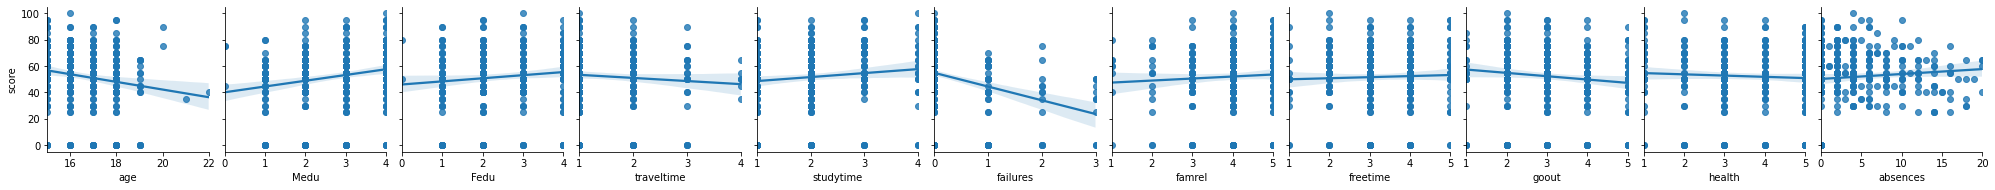

In [52]:
#Выявим корреляции результата экзамена (score) с количественными признаками:
sns.pairplot(studmath, x_vars=['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 
    'failures', 'famrel', 'freetime', 'goout', 'health', 'absences'], y_vars = ['score'], kind='reg')

Предварительные выводы (на основе очень слабых корреляций): 
    
Образование родителей положительно коррелирует с результатами экзамена;

С возрастом результат экзамена ухудшается;

Также отрицательно коррелируют с результатами экзамена признаки:время в пути, проведение времени с друзьями, текущее состояние здоровья и особенно количество внеучебных неудач;

Положительная корреляция у результата экзамена выявлена с признаками: время на учёбу помимо школы в неделю, семейные отношения, свободное время и (как ни странно) количество прогулов

In [ ]:
Качественные признаки: 1 school, 2 sex, 4 address, 5 famsize, 6 Pstatus, 9 Mjob, 10 Fjob, 11 reason, 12 guardian,  16 schoolsup, 17 famsup, 18 paid, 19 activities, 20 nursery, 21 higher, 22 internet, 23 romantic

In [ ]:
Вывод: сильные корреляции отсутствуют (кроме Fedu и Medu).